In [1]:
import sys
import random
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets,transforms


In [2]:
sys.path.append(r"C:\Users\amrul\programming\deep_learning\dl_projects\Generative_Deep_Learning_2nd_Edition")

In [3]:
from notebooks.utils import display

In [4]:
# define constants
IMAGE_SIZE=32
CHANNELS=1
STEP_SIZE=10
STEPS=60
NOISE=0.005
ALPHA=0.1
GRADIENT_CLIP=0.03
BATCH_SIZE=128
BUFFER_SIZE=8192
LEARNING_RATE = 1e-4
EPOCHS=60

In [5]:
import pathlib
datapath=pathlib.Path(r"C:\Users\amrul\programming\deep_learning\dl_projects\Generative_Deep_Learning_2nd_Edition\data")

In [6]:
# first let's just explore raw dataset as is, just by converting it to tensor

train_mnist = datasets.MNIST(str(datapath),train=True,download=True,transform=transforms.ToTensor())
test_mnist = datasets.MNIST(str(datapath),train=False,download=True, transform=transforms.ToTensor())

print(f"train mnist size : {len(train_mnist)}, test mnist size : {len(test_mnist)}")

train mnist size : 60000, test mnist size : 10000


In [7]:
image,label=train_mnist[33143]
print(f"image shape {image.shape}, min val : {image.min()}, max val : {image.max()}")

image shape torch.Size([1, 28, 28]), min val : 0.0, max val : 1.0


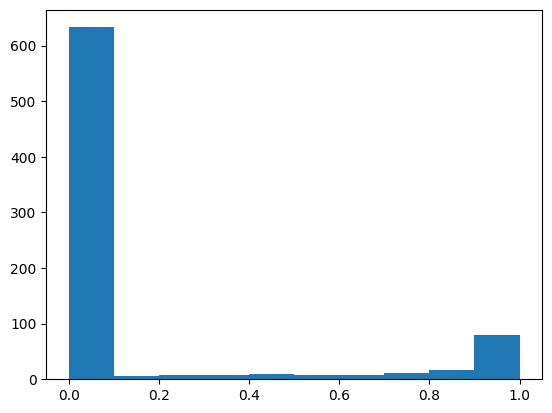

In [8]:
import matplotlib.pyplot as plt

flat_image = image.squeeze(0).numpy().flatten()
plt.hist(flat_image)
plt.show()

In [9]:
# now let's explore with normalization
transform = transforms.Compose([transforms.Pad(2),transforms.ToTensor(),transforms.Normalize(mean=[0.5],std=[0.5])])

train_mnist = datasets.MNIST(str(datapath),train=True,download=True,transform=transform)
test_mnist = datasets.MNIST(str(datapath),train=False,download=True, transform=transform)

print(f"train mnist size : {len(train_mnist)}, test mnist size : {len(test_mnist)}")

train mnist size : 60000, test mnist size : 10000


In [10]:
image,label=train_mnist[33143]
print(f"image shape {image.shape}, min val : {image.min()}, max val : {image.max()}")

image shape torch.Size([1, 32, 32]), min val : -1.0, max val : 1.0


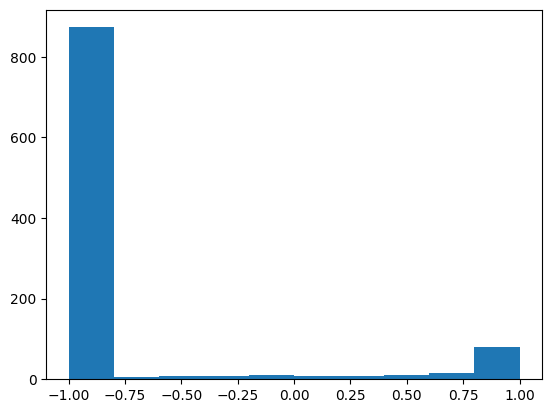

In [11]:
import matplotlib.pyplot as plt

flat_image = image.squeeze(0).numpy().flatten()
plt.hist(flat_image)
plt.show()